# Project - Bikes Rental Forcasting - Basic - Description

<b>Objective</b>


The objective of the project is - using historical usage patterns and weather data, forecast(predict) bike rental demand (number of bike users (‘cnt’)) on hourly basis.


Use the provided “Bikes Rental” data set to predict the bike demand (bike users count - 'cnt') using various best possible models (ML algorithms). Also, report the model that performs best, fine-tune the same model using one of the model fine-tuning techniques, and report the best possible combination of hyperparameters for the selected model. Lastly, use the selected model to make final predictions and compare the predicted values with the actual values.


Below are the details of the features list for the given Bikes data set:

   1. instant: record index

   2. dteday : date

   3. season: season (1: springer, 2: summer, 3: fall, 4: winter)

   4. yr: year (0: 2011, 1:2012)

   5. mnth: month (1 to 12)

   6. hr: hour (0 to 23)

   7. holiday: whether the day is a holiday or not

   8. weekday: day of the week

   9. workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

   10. weathersit:

       - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

        - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

   11. temp: Normalized temperature in Celsius. The values are derived via (tt_min)/(t_maxt_min), t_min=*8, t_max=+39 (only in hourly scale)

   12. atemp: Normalized feeling temperature in Celsius. The values are derived via (tt_min)/(t_maxt_min), t_min=*16, t_max=+50 (only in hourly scale)

   13. hum: Normalized humidity. The values are divided to 100 (max)

   14. windspeed: Normalized wind speed. The values are divided to 67 (max)

   13. casual: count of casual users

   14. registered: count of registered users

   15. cnt: count of total rental bikes including both casual and registered users


The "target" data set ('y') should have only one 'label' i.e. 'cnt'.


<b>We will be following the below steps to solve this problem:</b>

   1. Importing the libraries

   2. Loading the data

   3. Using some pre-defined utility functions

   4. Cleaning the data

   5. Dividing the dataset into training and test dataset
       - using train_test_split in the ratio 70:30
       
   6. Training several models and analyzing their performance to select a model

   7. Fine-tuning the model by finding the best hyper-parameters and features

   8. Evaluating selected model using test dataset




# Step 1: Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import os


# Step 2: Loading the Data

In [2]:
filePath = 'dataset/bikes.csv'
bikesData = pd.read_csv(filePath)

In [3]:
bikesData

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### Obeservation:
- We will have to use Standard Scaler to sandardize the values.

# Step 3:  Using some pre-defined utility functions

#### 1. Finding the data type of a column

In [4]:
type(bikesData['dteday'])

pandas.core.series.Series

####  2. Finding categorical feature

In [5]:
print(bikesData['windspeed'].value_counts(), '\n')
print(bikesData['hum'].value_counts(), '\n')
print(bikesData['temp'].value_counts(), '\n')
print(bikesData['weathersit'].value_counts(), '\n')

0.0000    2180
0.1343    1738
0.1642    1695
0.1940    1657
0.1045    1617
0.2239    1513
0.0896    1425
0.2537    1295
0.2836    1048
0.2985     808
0.3284     602
0.3582     460
0.3881     381
0.4179     296
0.4478     176
0.4627     146
0.4925     112
0.5224      84
0.5821      44
0.5522      39
0.6119      23
0.6418      14
0.6567      11
0.6866       5
0.8507       2
0.8060       2
0.7463       2
0.7164       2
0.7761       1
0.8358       1
Name: windspeed, dtype: int64 

0.88    657
0.83    630
0.94    560
0.87    488
0.70    430
       ... 
0.10      1
0.91      1
0.13      1
0.97      1
0.12      1
Name: hum, Length: 89, dtype: int64 

0.62    726
0.66    693
0.64    692
0.70    690
0.60    675
0.36    671
0.34    645
0.30    641
0.40    614
0.32    611
0.56    579
0.72    570
0.54    569
0.26    559
0.46    559
0.52    556
0.42    548
0.50    531
0.24    522
0.74    516
0.44    507
0.22    421
0.76    396
0.38    372
0.20    354
0.68    349
0.80    325
0.58    305
0.28    301


##### Observation:
 - Here, 'weathersit' feature has 4 categories.
 - It donot have ordinal values, so it will not use OneHotEncoder.

#### 3. Finding features as per data type

In [6]:
print('float columns: ',bikesData.columns[bikesData.dtypes =='float'],'\n')
print('integer columns: ',bikesData.columns[bikesData.dtypes =='int'],'\n')
print('object columns: ',bikesData.columns[bikesData.dtypes =='object'],'\n')
print('str columns: ',bikesData.columns[bikesData.dtypes =='str'],'\n')

float columns:  Index(['temp', 'atemp', 'hum', 'windspeed'], dtype='object') 

integer columns:  Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'casual', 'registered', 'cnt'],
      dtype='object') 

object columns:  Index(['dteday'], dtype='object') 

str columns:  Index([], dtype='object') 



#### 4. Get table details

In [7]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Observation:
- There is no null value
- We donot have to use impute fill missing values
- 17 features are present in the raw dataset

#### 5. Find the Unique Values

In [8]:
bikesData['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5])

In [9]:
bikesData['yr'].unique()

array([0, 1])

In [10]:
bikesData['weathersit'].unique()

array([1, 2, 3, 4])

In [11]:
bikesData['hr'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [12]:
bikesData['season'].unique()

array([1, 2, 3, 4])

#### 6. Finding the mean of a feature columns

In [13]:
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
#Finding mean by column, by default axis = 0

bikesData['hum'].mean()

0.6272288394038822

In [15]:
#Finding mean by rows

bikesData['hum'].mean

<bound method Series.mean of 0        0.81
1        0.80
2        0.80
3        0.75
4        0.75
         ... 
17374    0.60
17375    0.60
17376    0.60
17377    0.56
17378    0.65
Name: hum, Length: 17379, dtype: float64>

# Step 4: Cleaning the Data

In [16]:
bikesData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Observation:

As we can see, the bikesData data set contains some features which may not be needed for this problem e.g.

- instant - This is just an index holder.

- casual - It contains the count of casual bike riders, which are already included in the overall users count i.e. 'cnt', hence not needed.

- registered - It contains the registered bike riders, which again, like the casual riders, are already included in the overall users count i.e. 'cnt', hence not needed.

- atemp - It is the 'feel' temperature, which may not be needed, as we already have 'temp' feature which contains temperature of the area - duplicate feature, hence not needed.

- dteday - It is the Date. Since, our prediction is not based on the Date, its based on hour of the day, hence Date is not needed.

<b>Since, these features are not needed for our current problem, let us drop them from the bikesData data set.</b>

#### 1. Drop the unwanted features

In [17]:
columnsToDrop = ['instant', 'casual', 'registered', 'atemp', 'dteday']

bikesData = bikesData.drop(columnsToDrop , axis = 1)

bikesData.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


#### 2. Apply Feature Scaling using Standard Scalar

In [18]:
columnsToScale = [ 'temp', 'hum', 'windspeed'] #Creating list of columns to scale

scaler = StandardScaler() #Creating an instance of StandardScaler

bikesData[columnsToScale] = scaler.fit_transform(bikesData[columnsToScale])

bikesData[columnsToScale]

,temp,hum,windspeed
0,-1.334648,0.947372,-1.553889
1,-1.438516,0.895539,-1.553889
2,-1.438516,0.895539,-1.553889
3,-1.334648,0.636370,-1.553889
4,-1.334648,0.636370,-1.553889
...,...,...,...
17374,-1.230779,-0.141137,-0.211691
17375,-1.230779,-0.141137,-0.211691
17376,-1.230779,-0.141137,-0.211691
17377,-1.230779,-0.348473,-0.456099


In [19]:
#Checking the metrics of the scaled column

bikesData[columnsToScale].describe()

,temp,hum,windspeed
count,1.737900e+04,1.737900e+04,1.737900e+04
mean,3.497212e-16,-4.195150e-16,4.035529e-15
std,1.000029e+00,1.000029e+00,1.000029e+00
min,-2.477205e+00,-3.251166e+00,-1.553889e+00
25%,-8.153035e-01,-7.631431e-01,-6.996886e-01
50%,1.564696e-02,1.436398e-02,3.189880e-02
75%,8.465975e-01,7.918711e-01,5.198962e-01
max,2.612367e+00,1.932215e+00,5.399871e+00


##### Observation:
- After Feature Scaling std, and mean is almost same for all 3 columns

#### 3. Feature Engineering: Add a New Column to the Table by adding a panda series i.e. column

In [20]:
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24 

#bikesData.shape[0] takes the number of total number of rows which is also the number of days for the dataset

In [21]:
bikesData.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
0,1,0,1,0,0,6,0,1,-1.334648,0.947372,-1.553889,16,0.000000
1,1,0,1,1,0,6,0,1,-1.438516,0.895539,-1.553889,40,0.041667
2,1,0,1,2,0,6,0,1,-1.438516,0.895539,-1.553889,32,0.083333
3,1,0,1,3,0,6,0,1,-1.334648,0.636370,-1.553889,13,0.125000
4,1,0,1,4,0,6,0,1,-1.334648,0.636370,-1.553889,1,0.166667


# Step 5: Dividing the Dataset into Train and Test Dataset

#### 1. Split using the Random Sampling i.e. train_test_split

In [83]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bikesData, test_size = 0.3, random_state = 42)



In [23]:
train_set.shape

(12165, 13)

In [24]:
test_set.shape

(5214, 13)

#### 2. Sort the train_set and test_set values by dayCount

In [84]:
train_set.sort_values('dayCount', axis = 0, inplace = True)
test_set.sort_values('dayCount', axis = 0, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
train_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
1,1,0,1,1,0,6,0,1,-1.438516,0.895539,-1.553889,40,0.041667
2,1,0,1,2,0,6,0,1,-1.438516,0.895539,-1.553889,32,0.083333
4,1,0,1,4,0,6,0,1,-1.334648,0.636370,-1.553889,1,0.166667
6,1,0,1,6,0,6,0,1,-1.438516,0.895539,-1.553889,2,0.250000
7,1,0,1,7,0,6,0,1,-1.542385,1.206542,-1.553889,3,0.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,1,1,12,17,0,1,1,2,-1.230779,-0.763143,-0.821484,164,723.833333
17373,1,1,12,18,0,1,1,2,-1.230779,-0.763143,-0.456099,122,723.875000
17374,1,1,12,19,0,1,1,2,-1.230779,-0.141137,-0.211691,119,723.916667
17376,1,1,12,21,0,1,1,1,-1.230779,-0.141137,-0.211691,90,724.000000


In [85]:
test_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
0,1,0,1,0,0,6,0,1,-1.334648,0.947372,-1.553889,16,0.000000
3,1,0,1,3,0,6,0,1,-1.334648,0.636370,-1.553889,13,0.125000
5,1,0,1,5,0,6,0,2,-1.334648,0.636370,-0.821484,1,0.208333
8,1,0,1,8,0,6,0,1,-1.334648,0.636370,-1.553889,8,0.333333
14,1,0,1,14,0,6,0,2,-0.192091,0.480868,0.764304,106,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17354,1,1,12,23,0,0,0,1,-1.542385,-0.607642,0.276306,49,723.083333
17355,1,1,12,0,0,1,1,1,-1.646254,-0.400306,0.031899,34,723.125000
17367,1,1,12,12,0,1,1,2,-1.334648,-0.348473,0.031899,224,723.625000
17375,1,1,12,20,0,1,1,2,-1.230779,-0.141137,-0.211691,89,723.958333


#### 3. Preparing to Train Models

In [28]:
#importing cross-validation libraries

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


#importing regression models from libraries

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [32]:
#from xgboost import XGBRegressor
#installation issues

#### 4. Separate Independent and Dependent Features

In [33]:
#Independent Features
trainingCols = train_set.drop('cnt', axis = 1)

In [35]:
trainingCols

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,dayCount
1,1,0,1,1,0,6,0,1,-1.438516,0.895539,-1.553889,0.041667
2,1,0,1,2,0,6,0,1,-1.438516,0.895539,-1.553889,0.083333
4,1,0,1,4,0,6,0,1,-1.334648,0.636370,-1.553889,0.166667
6,1,0,1,6,0,6,0,1,-1.438516,0.895539,-1.553889,0.250000
7,1,0,1,7,0,6,0,1,-1.542385,1.206542,-1.553889,0.291667
...,...,...,...,...,...,...,...,...,...,...,...,...
17372,1,1,12,17,0,1,1,2,-1.230779,-0.763143,-0.821484,723.833333
17373,1,1,12,18,0,1,1,2,-1.230779,-0.763143,-0.456099,723.875000
17374,1,1,12,19,0,1,1,2,-1.230779,-0.141137,-0.211691,723.916667
17376,1,1,12,21,0,1,1,1,-1.230779,-0.141137,-0.211691,724.000000


In [34]:
#Dependent Feature
trainingLabels = train_set['cnt'].copy()

In [36]:
trainingLabels

1         40
2         32
4          1
6          2
7          3
        ... 
17372    164
17373    122
17374    119
17376     90
17378     49
Name: cnt, Length: 12165, dtype: int64

# Step 6: Training several models and analyzing their performance to select a model

#### Analyzing performance using cross-validation

In [37]:
#function to display the scores

def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())

##### 1. Decision Tree Regression using cross - validation

In [44]:


dec_reg = DecisionTreeRegressor(random_state=42)


#mean absolute error scores
dt_mae_scores = - cross_val_score(dec_reg,
                              trainingCols,trainingLabels,
                              cv = 10,
                              scoring = 'neg_mean_absolute_error')
display_scores(dt_mae_scores)


Scores:  [42.79622021 50.31963846 37.03615448 44.15365653 47.07723911 72.03782895
 58.36019737 48.22615132 50.94407895 96.88898026]
Mean:  54.78401456342171
Standard deviation:  16.70953413912157


In [43]:
#mean squared error scores
dt_mae_scores = cross_val_score(dec_reg,
                              trainingCols,trainingLabels,
                              cv = 10,
                              scoring = 'neg_mean_squared_error')
dt_mse_scores = np.sqrt(-dt_mae_scores)
display_scores(dt_mse_scores)

Scores:  [ 65.10279464  77.670527    60.59989749  73.66268699  75.76702279
 113.26870416  96.665763    81.28550338  86.87354694 149.4085296 ]
Mean:  88.03049759858746
Standard deviation:  25.035783082114


##### 2. Linear Regression using cross - validation

In [55]:
#mean absolute error scores

lin_reg = LinearRegression()

lr_mae_scores = - cross_val_score (lin_reg,
                                  trainingCols, trainingLabels,
                                  cv = 10,
                                  scoring = 'neg_mean_absolute_error')
display_scores (lr_mae_scores)



Scores:  [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean:  110.43241256942221
Standard deviation:  31.42696570529598


In [54]:
#mean squared error scores

lr_mae_scores = cross_val_score (lin_reg,
                                 trainingCols, trainingLabels,
                                 cv = 10,
                                 scoring = 'neg_mean_squared_error')
lr_mse_scores = np.sqrt(- lr_mae_scores)
display_scores (lr_mse_scores)

Scores:  [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean:  141.19022901181754
Standard deviation:  37.5556507591956


##### 3. Random Forest Regression using cross - validation


In [56]:
#mean absolute error scores

forest_reg = RandomForestRegressor(random_state = 42, n_estimators = 150)
rf_mae_scores = - cross_val_score(forest_reg,
                                 trainingCols, trainingLabels,
                                 cv = 10,
                                 scoring = 'neg_mean_absolute_error')
display_scores(rf_mae_scores)


Scores:  [33.33921665 33.5634292  28.51544782 31.74855656 36.55779239 57.78830592
 40.91410636 40.72524123 37.58651864 84.75860197]
Mean:  42.54972167412677
Standard deviation:  15.998616999257116


In [58]:
#mean squared error scores

forest_reg = RandomForestRegressor(random_state = 42, n_estimators = 150)
rf_mae_scores = cross_val_score(forest_reg,
                               trainingCols, trainingLabels,
                               cv = 10,
                               scoring = 'neg_mean_squared_error')

rf_mse_scores = np.sqrt(-rf_mae_scores)
display_scores(rf_mse_scores)


Scores:  [ 45.56103408  50.97710002  43.43059587  52.22561489  60.45598311
  94.23444802  66.14917355  65.25550321  61.67555223 132.00386791]
Mean:  67.19688728966834
Standard deviation:  25.55764715717203


##### Observation:
- Here, we will choose Random_Forest_Regression as it has lowest root mean square error and low variance of errors.
- RandomForest will be used for fine tuning.

# Step 7: Fine Tuning the Selected Model

#### 1. Import GrideSearchCV from Model_Selection

In [61]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#to find the hyperparameters of Random_Forest_Regression
help(forest_reg)

#### 2. Initiate the Parameters Grid to experiment

In [67]:
param_grid = [ {'n_estimators': [120, 150],
                'max_features': [10, 12],
                'max_depth': [15, 28]}]

#### 3. Create and Instance of GridSearchCV by passing the the Selected Model

In [68]:
grid_search = GridSearchCV (forest_reg,
                           param_grid,
                           cv = 5,
                           scoring = 'neg_mean_squared_error')


#### 4. Run the Grid Search algorithm on the Training data set

In [70]:
grid_search.fit(trainingCols, trainingLabels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=150, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

#### 5. Find the best estimators/hyperparameters to be used for the model

In [71]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

##### 6. Get the relative importance of each feature (of the Training data set) by using feature_importances_

In [72]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [73]:
print(feature_importances)

[0.00424888 0.00145493 0.00570279 0.58348648 0.00215107 0.01790669
 0.06993018 0.01688336 0.09373438 0.03176755 0.00907719 0.16365649]


##### Observations:
- The best value of n_estimators parameter suggested by Grid Search ('best parameters') : 100 to 150,since its 150
- the best value of max_features parameter suggested by Grid Search ('best parameters') : 8 to 12, since its 10
- the best value of max_depth parameter suggested by Grid Search ('best parameters'): 28



# Step 8: Evaluating the Final Model Using Test data

#### 1. Store the final model with the best estimators

In [74]:
final_model = grid_search.best_estimator_

#### 2. Sorting as per 'Day Count'

In [75]:
test_set.sort_values('dayCount', axis= 0, inplace=True)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### 3. Separate Independent and Dpendent Values of the Test Set


In [76]:
test_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
0,1,0,1,0,0,6,0,1,-1.334648,0.947372,-1.553889,16,0.000000
3,1,0,1,3,0,6,0,1,-1.334648,0.636370,-1.553889,13,0.125000
5,1,0,1,5,0,6,0,2,-1.334648,0.636370,-0.821484,1,0.208333
8,1,0,1,8,0,6,0,1,-1.334648,0.636370,-1.553889,8,0.333333
14,1,0,1,14,0,6,0,2,-0.192091,0.480868,0.764304,106,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17354,1,1,12,23,0,0,0,1,-1.542385,-0.607642,0.276306,49,723.083333
17355,1,1,12,0,0,1,1,1,-1.646254,-0.400306,0.031899,34,723.125000
17367,1,1,12,12,0,1,1,2,-1.334648,-0.348473,0.031899,224,723.625000
17375,1,1,12,20,0,1,1,2,-1.230779,-0.141137,-0.211691,89,723.958333


#### 4. Define the columns names

In [87]:
test_x_cols = test_set.drop('cnt', axis = 1).columns.values

In [88]:
test_x_cols

array(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'dayCount'], dtype=object)

In [89]:
test_y_cols = 'cnt'

In [90]:
test_y_cols

'cnt'

#### 5. Slice the Test Set and Create the Independent Value and Dependent Values Dataset

In [92]:
X_test = test_set.loc[:,test_x_cols]
y_test = test_set.loc[:,test_y_cols]


In [93]:
type(X_test)

pandas.core.frame.DataFrame

In [94]:
type(y_test)

pandas.core.series.Series

#### 6. Make the predictions using final model and store it in new column of test_set - predictedCounts_test

In [95]:
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)

#here, predicted dataset is test_set.loc[:,'predictedCounts_test']

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


#### 7. Find the root mean squared error

In [100]:
mse = mean_squared_error(y_test, test_set.loc[:,'predictedCounts_test'])
final_mse = np.sqrt(mse)
print(final_mse)

39.50507676859462


In [101]:
test_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount,predictedCounts_test
0,1,0,1,0,0,6,0,1,-1.334648,0.947372,-1.553889,16,0.000000,35.973333
3,1,0,1,3,0,6,0,1,-1.334648,0.636370,-1.553889,13,0.125000,10.873333
5,1,0,1,5,0,6,0,2,-1.334648,0.636370,-0.821484,1,0.208333,4.680000
8,1,0,1,8,0,6,0,1,-1.334648,0.636370,-1.553889,8,0.333333,21.013333
14,1,0,1,14,0,6,0,2,-0.192091,0.480868,0.764304,106,0.583333,120.186667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17354,1,1,12,23,0,0,0,1,-1.542385,-0.607642,0.276306,49,723.083333,39.900000
17355,1,1,12,0,0,1,1,1,-1.646254,-0.400306,0.031899,34,723.125000,40.466667
17367,1,1,12,12,0,1,1,2,-1.334648,-0.348473,0.031899,224,723.625000,172.180000
17375,1,1,12,20,0,1,1,2,-1.230779,-0.141137,-0.211691,89,723.958333,96.440000


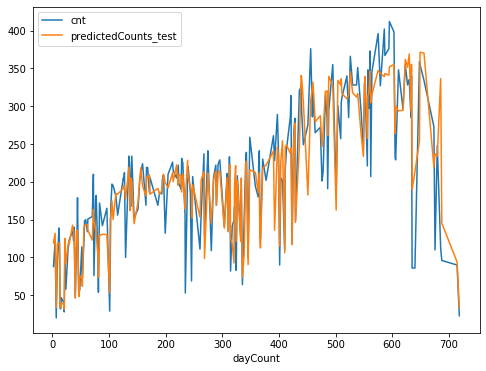

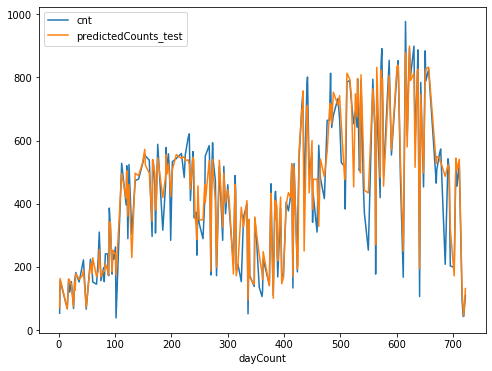

In [102]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()